In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld
from datetime import datetime
import matplotlib.dates as mdates

temp_df = pd.read_csv("C:/Users/jun99/OneDrive - 계명대학교/바탕 화면/Project/TP/분석 연습/data/heart_rate.csv")
temp_df.head()

,pkg_name,heart_beat_count,time_offset,binning_data,max,heart_rate,comment,start_time,deviceuuid,custom,end_time,datauuid,create_time,update_time,min
0,com.sec.android.app.shealth,1,32400000,921ae363-8895-16a1-0251-e75599afcfe6.binning_data,115,109,NaN,2023. 07. 24. 18:00:00,AIAJJofc8K,NaN,2023. 07. 24. 18:59:02,921ae363-8895-16a1-0251-e75599afcfe6,2023. 07. 24. 18:59:02,2023. 07. 24. 18:59:02,71
1,com.sec.android.app.shealth,1,32400000,48b6ccc4-ba62-0b99-4054-6126431f4230.binning_data,118,102,NaN,2023. 07. 24. 19:00:00,AIAJJofc8K,NaN,2023. 07. 24. 19:59:01,48b6ccc4-ba62-0b99-4054-6126431f4230,2023. 07. 24. 19:59:01,2023. 07. 24. 19:59:01,70
2,com.sec.android.app.shealth,1,32400000,915a1260-8a88-cc83-117d-036f111d2576.binning_data,125,123,NaN,2023. 07. 24. 20:00:00,AIAJJofc8K,NaN,2023. 07. 24. 20:59:00,915a1260-8a88-cc83-117d-036f111d2576,2023. 07. 24. 20:59:00,2023. 07. 24. 20:59:00,83
3,com.sec.android.app.shealth,1,32400000,cd353d52-bd72-566a-d07e-a49fe9eef546.binning_data,150,85,NaN,2023. 07. 24. 21:00:00,AIAJJofc8K,NaN,2023. 07. 24. 21:59:01,cd353d52-bd72-566a-d07e-a49fe9eef546,2023. 07. 24. 21:59:01,2023. 07. 24. 21:59:01,82
4,com.sec.android.app.shealth,1,32400000,4ccf68b7-86fd-32c7-c656-8248105b1a30.binning_data,117,78,NaN,2023. 07. 24. 22:00:00,AIAJJofc8K,NaN,2023. 07. 24. 22:59:00,4ccf68b7-86fd-32c7-c656-8248105b1a30,2023. 07. 24. 22:59:00,2023. 07. 24. 22:59:00,68


In [4]:
tem = temp_df[['heart_rate','update_time']].copy()
print(tem.head())

# Assuming tem is your DataFrame with 'update_time' in the format 'yyyymmdd hhmmss'
# Convert 'update_time' to datetime
tem['update_time'] = pd.to_datetime(tem['update_time'], format='%Y. %m. %d. %H:%M:%S')

# Format 'update_time' to 'yymmdd'
# tem['update_time_yymmdd'] = tem['update_time'].dt.strftime('%y-%m-%d')
 
# tem.set_index('update_time', inplace=True)

print(tem.head())

   heart_rate             update_time
0         109  2023. 07. 24. 18:59:02
1         102  2023. 07. 24. 19:59:01
2         123  2023. 07. 24. 20:59:00
3          85  2023. 07. 24. 21:59:01
4          78  2023. 07. 24. 22:59:00
   heart_rate         update_time
0         109 2023-07-24 18:59:02
1         102 2023-07-24 19:59:01
2         123 2023-07-24 20:59:00
3          85 2023-07-24 21:59:01
4          78 2023-07-24 22:59:00


                   mean  min  max
update_time                      
2023-07-24   101.500000   78  123
2023-07-25    75.708333   52  137
2023-07-26    84.842105   54  200


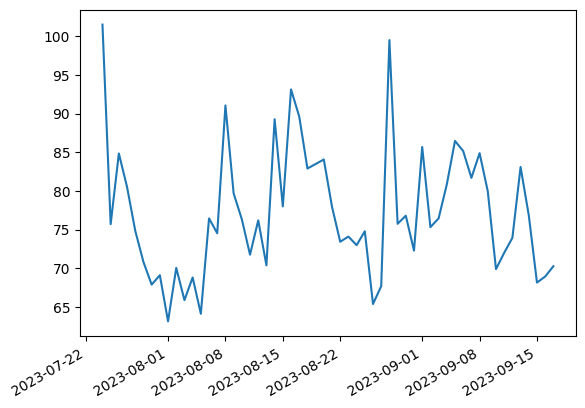

In [28]:
### daily로 변환
daily_stats = tem.groupby(tem['update_time'].dt.date)['heart_rate'].agg(['mean', 'min', 'max'])
print(daily_stats.head(3))

# 앞의 70% 데이터만 학습에 사용
train_df = daily_stats.iloc[:int(len(daily_stats)*0.7)]
test_df = daily_stats.iloc[int(len(daily_stats)*0.7):]

plt.plot(daily_stats['mean'])
plt.gcf().autofmt_xdate()
plt.show()

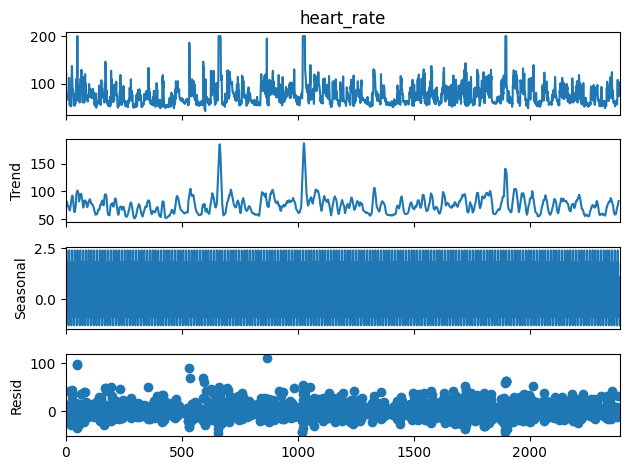

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Reset the index to make 'update_time' a regular column
tem.reset_index(inplace=True)

tem.index

# Convert 'update_time' to datetime
tem['update_time'] = pd.to_datetime(tem['update_time'], format='%Y. %m. %d. %H:%M:%S')

# Reset the index to make 'update_time' a regular column
tem.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(tem['heart_rate'], model='additive', period=12)

result.plot()
plt.show()

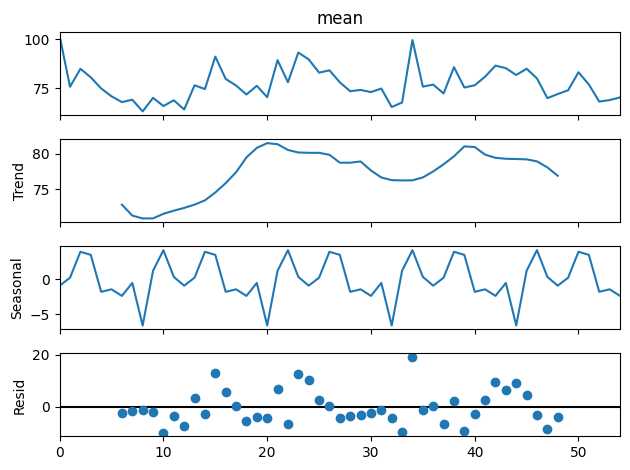

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'update_time' to datetime
daily_stats['ymd'] = pd.to_datetime(daily_stats.index, format='%Y. %m. %d')

# Reset the index to make 'update_time' a regular column
daily_stats.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(daily_stats['mean'], model='additive', period=12)

result.plot()
plt.show()

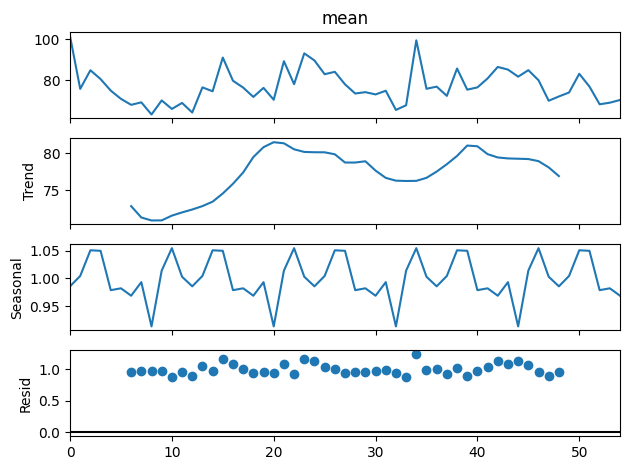

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'update_time' to datetime
# daily_stats['ymd'] = pd.to_datetime(daily_stats.index, format='%Y. %m. %d')

# Reset the index to make 'update_time' a regular column
daily_stats.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(daily_stats['mean'], model='multiplicative', period=12)

result.plot()
plt.show()

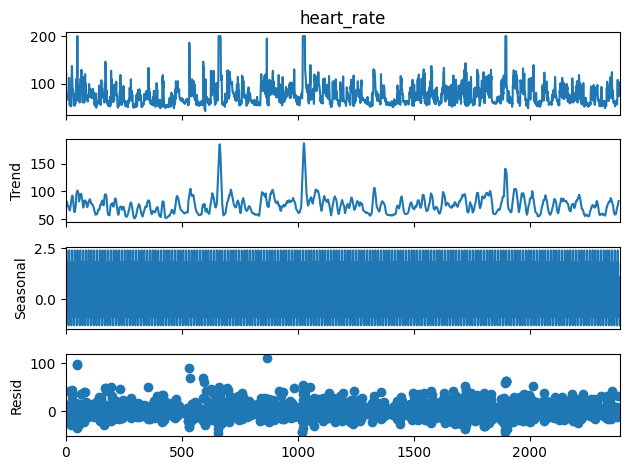

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'update_time' to datetime
tem['update_time'] = pd.to_datetime(tem['update_time'], format='%Y. %m. %d. %H:%M:%S')

# Reset the index to make 'update_time' a regular column
tem.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
result1 = seasonal_decompose(tem['heart_rate'], model="addictive", period=12)

result1.plot()
plt.show()

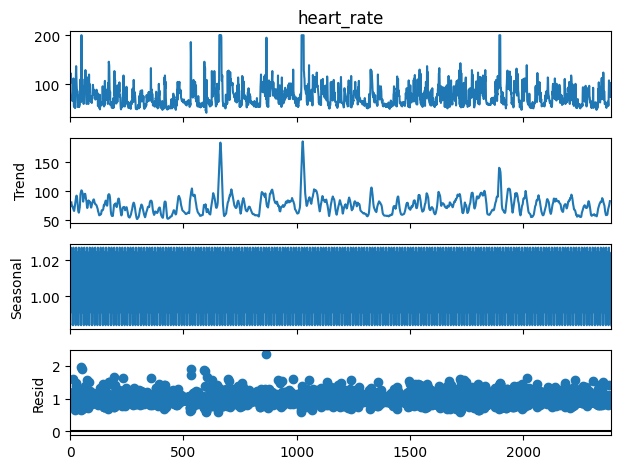

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'update_time' to datetime
tem['update_time'] = pd.to_datetime(tem['update_time'], format='%Y. %m. %d. %H:%M:%S')

# Reset the index to make 'update_time' a regular column
tem.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
result1 = seasonal_decompose(tem['heart_rate'], model="multiplicative", period=12)

result1.plot()
plt.show()

#### tem stats

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ES 모델을 만들어 학습하고 전체 데이터에 대해 예측한다.
# additive는 경향성이 일정함을 의미하고, 경향성 변동폭이 있을 때는 multiplicative를 사용
model = ExponentialSmoothing(
    train_df['heart_rate'], trend='additive', seasonal='additive', seasonal_periods=12).fit()
    
prediction = model.predict(
    start=tem.index[0], end=tem.index[-1])

"""Brutlag Algorithm"""
PERIOD = 12        # The given time series has seasonal_period=12
GAMMA = 0.3684211  # the seasonility component
SF = 1.96          # brutlag scaling factor for the confidence bands.
UB = []            # upper bound or upper confidence band
LB = []            # lower bound or lower confidence band

# 실측치와 예측치를 비교하는 자료구조
difference_array = []
dt = []
difference_table = {"actual": tem, "predicted": prediction, "difference": difference_array, "UB": UB, "LB": LB}

# brutlag 알고리즘
# 12개월 이전의 실측/결측 차이에 0.63, 이번달 차이에 0.37 정도의 가중치를 주어 저장
for i in range(len(prediction)):
    diff = tem.iloc[i]-prediction.iloc[i]
    if i < PERIOD:
        dt.append(GAMMA*abs(diff))
    else:
        dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

# 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
    difference_array.append(diff)
    UB.append(prediction[i]+SF*dt[i])
    LB.append(prediction[i]-SF*dt[i])
    
"""Classification of data points as either normal or anomaly"""
normal = []
normal_date = []
anomaly = []
anomaly_date = []

# 신뢰구간을 벗어나는지 판단하여 normal, anomaly 결정
for i in range(len(tem.index)):
    if ((UB[i] <= tem.iloc[i]).bool() or (LB[i] >= tem.iloc[i]).bool()) and i > PERIOD:
        anomaly_date.append(tem.index[i])
        anomaly.append(tem.iloc[i][0])
    else:
        normal_date.append(tem.index[i])
        normal.append(tem.iloc[i][0])
        
anomaly = pd.DataFrame({"date": anomaly_date, "value": anomaly})
anomaly.set_index('date', inplace=True)
normal = pd.DataFrame({"date": normal_date, "value": normal})
normal.set_index('date', inplace=True)

# plotting
plt.figure(figsize=(24,12))
plt.plot(normal.index, normal, 'o', color='green')
plt.plot(anomaly.index, anomaly, 'o', color='red')
plt.plot(tem.index, UB, linestyle='--', color='grey')
plt.plot(tem.index, LB, linestyle='--', color='grey')
plt.legend(['Normal', 'Anomaly', 'Upper Bound', 'Lower Bound'],fontsize=15)
plt.show()

#### daily stats

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ES 모델을 만들어 학습하고 전체 데이터에 대해 예측한다.
# additive는 경향성이 일정함을 의미하고, 경향성 변동폭이 있을 때는 multiplicative를 사용
model = ExponentialSmoothing(
    train_df['mean'], trend='additive', seasonal='additive', seasonal_periods=12).fit()
    
prediction = model.predict(
    start=tem.index[0], end=tem.index[-1])

"""Brutlag Algorithm"""
PERIOD = 12        # The given time series has seasonal_period=12
GAMMA = 0.3684211  # the seasonility component
SF = 1.96          # brutlag scaling factor for the confidence bands.
UB = []            # upper bound or upper confidence band
LB = []            # lower bound or lower confidence band

# 실측치와 예측치를 비교하는 자료구조
difference_array = []
dt = []
difference_table = {"actual": daily_stats, "predicted": prediction, "difference": difference_array, "UB": UB, "LB": LB}

# brutlag 알고리즘
# 12개월 이전의 실측/결측 차이에 0.63, 이번달 차이에 0.37 정도의 가중치를 주어 저장
for i in range(len(prediction)):
    diff = daily_stats.iloc[i]-prediction.iloc[i]
    if i < PERIOD:
        dt.append(GAMMA*abs(diff))
    else:
        dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

# 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
    difference_array.append(diff)
    UB.append(prediction[i]+SF*dt[i])
    LB.append(prediction[i]-SF*dt[i])
    
"""Classification of data points as either normal or anomaly"""
normal = []
normal_date = []
anomaly = []
anomaly_date = []

# 신뢰구간을 벗어나는지 판단하여 normal, anomaly 결정
for i in range(len(daily_stats.index)):
    if ((UB[i] <= daily_stats.iloc[i]).bool() or (LB[i] >= tem.iloc[i]).bool()) and i > PERIOD:
        anomaly_date.append(tem.index[i])
        anomaly.append(tem.iloc[i][0])
    else:
        normal_date.append(tem.index[i])
        normal.append(tem.iloc[i][0])
        
anomaly = pd.DataFrame({"date": anomaly_date, "value": anomaly})
anomaly.set_index('date', inplace=True)
normal = pd.DataFrame({"date": normal_date, "value": normal})
normal.set_index('date', inplace=True)

# plotting
plt.figure(figsize=(24,12))
plt.plot(normal.index, normal, 'o', color='green')
plt.plot(anomaly.index, anomaly, 'o', color='red')
plt.plot(tem.index, UB, linestyle='--', color='grey')
plt.plot(tem.index, LB, linestyle='--', color='grey')
plt.legend(['Normal', 'Anomaly', 'Upper Bound', 'Lower Bound'],fontsize=15)
plt.show()